In [1]:
# cd CrisisMMD_Dataset

In [2]:
%reload_ext autoreload # ensuring that any edits to libraries you make are reloaded here automatically
%autoreload 2
%matplotlib inline #to ensuere charts or images displayed are shown in this notebook

In [3]:
# importing necessary packages
from fastai import *
from fastai.text import *
from fastai.callbacks import *
from Precision_Module import Precision1

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import aidrtokenize
from sklearn.metrics import classification_report

In [5]:
path = Path('/notebooks/CrisisMMD_Dataset')
# path.ls()

In [6]:
path_img = path/'data_image'

In [7]:
def clean_ascii(text):
    # function to remove non-ASCII chars from data
    return ''.join(i for i in text if ord(i) < 128)

In [8]:
data_info_text_file = 'new_task_informative_text_img_agreed_lab_info_data.tsv'
test_data_info_text_file = 'new_task_informative_text_img_agreed_lab_test_data.tsv' 

In [9]:
# reading the required data from various file and saving it with necessary changes in order to avoid repetition 

if data_info_text_file and test_data_info_text_file in path.ls():
    data_info_text_file = pd.read_csv('new_task_informative_text_img_agreed_lab_info_data.tsv',delimiter='\t',encoding='utf-8')
    test_info_text_file = pd.read_csv('task_informative_text_img_agreed_lab_test_data.tsv',delimiter='\t',encoding='utf-8')
else:
    train_info_text=pd.read_csv('task_informative_text_img_agreed_lab_train.tsv',delimiter='\t',encoding='utf-8')
    test_info_text=pd.read_csv('task_informative_text_img_agreed_lab_test.tsv',delimiter='\t',encoding='utf-8')
    dev_info_text=pd.read_csv('task_informative_text_img_agreed_lab_dev.tsv',delimiter='\t',encoding='utf-8')
    
    # applying tokenizer
    train_info_text['tweet_text']=train_info_text['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    dev_info_text['tweet_text']=dev_info_text['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    test_info_text['tweet_text']=test_info_text['tweet_text'].apply(lambda x:aidrtokenize.tokenize(x))
    
    train_info_text['tweet_text'] = train_info_text['tweet_text'].apply(lambda x:clean_ascii(x))
    dev_info_text['tweet_text'] = dev_info_text['tweet_text'].apply(lambda x:clean_ascii(x))
    test_info_text['tweet_text'] = test_info_text['tweet_text'].apply(lambda x:clean_ascii(x))
    
    train_info_text['is_valid'] = False
    dev_info_text['is_valid'] = True
    test_info_text['is_valid'] = False 

    train_info_text['is_test'] = False
    dev_info_text['is_test'] = False
    test_info_text['is_test'] = True
    
    data_info_text = pd.concat([train_info_text,dev_info_text],axis=0).reset_index()
    data_info_text = data_info_text.drop(['index'],axis=1)
    
    test_data_info_text = pd.concat([train_info_text,test_info_text],axis=0).reset_index()
    test_data_info_text = test_data_info_text.drop(['index'],axis=1)
    
    data_info_text.to_csv('new_task_informative_text_img_agreed_lab_info_data.tsv',encoding='utf-8')
    test_data_info_text.to_csv('new_task_informative_text_img_agreed_lab_test_data.tsv',encoding='utf-8')

In [10]:
# import zipfile
# zf = zipfile.ZipFile("crisismmd_datasplit_agreed_label.zip")
# zf.extractall()

In [11]:
print(f"shape of data: {data_info_text.shape}\n")
print(data_info_text['is_valid'].value_counts())
print("="*50)
print(f"shape of test data: {test_data_info_text.shape}\n")
print(test_data_info_text['is_test'].value_counts())

shape of data: (11174, 11)

False    9601
True     1573
Name: is_valid, dtype: int64
shape of test data: (11135, 11)

False    9601
True     1534
Name: is_test, dtype: int64


In [12]:
data_info_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917791291823591425,917791291823591425_0,pls share were capturing wildfire response rec...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
3,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
4,california_wildfires,917815040962695168,917815040962695168_0,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False


In [13]:
test_data_info_text.head()

,event_name,tweet_id,image_id,tweet_text,image,label,label_text,label_image,label_text_image,is_valid,is_test
0,california_wildfires,917791291823591425,917791291823591425_0,pls share were capturing wildfire response rec...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
1,california_wildfires,917793137925459968,917793137925459968_0,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
2,california_wildfires,917793137925459968,917793137925459968_1,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
3,california_wildfires,917793137925459968,917793137925459968_2,california wildfires destroy more than structu...,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False
4,california_wildfires,917815040962695168,917815040962695168_0,photos of california destructive wildfires via,data_image/california_wildfires/10_10_2017/917...,informative,informative,informative,Positive,False,False


In [14]:
data_info_text['tweet_text'][0]

'pls share were capturing wildfire response recovery info here'

In [15]:
# preparing data for language model in order to get encoder and word embedding vocab for text classification model
data_lm = (TextList
           .from_df(data_info_text,path, cols='tweet_text')
           #Where are the text? Column 'text' of texts.csv
           .split_from_df(col='is_valid')
           #How to split it? using is_valid columns of dataframe
           .label_for_lm()
           #Label it for a language model
           .databunch())
           #Finally we convert to a DataBunch

In [16]:
data_lm

TextLMDataBunch;

Train: LabelList (9601 items)
x: LMTextList
xxbos pls share were xxunk wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via
y: LMLabelList
,,,,
Path: /notebooks/CrisisMMD_Dataset;

Valid: LabelList (1573 items)
x: LMTextList
xxbos we ve lost track of how many xxunk teams have helped so proud of our church harvey,xxbos the xxunk above xxunk got destroyed the xxunk wall got blown out hurricanemaria,xxbos californias xxunk fire in xxunk captured in pictures and videos xxunk,xxbos one of the first solar storage tesla energy projects in puerto rico has come online,xxbos tornado warning including xxunk wa xxunk river wa deep river wa until pm xxunk
y: LMLabelList
,,,,
Path: /notebooks/CrisisMMD_Dataset;

Test: None

In [17]:
# showing the data with corresponding annotations
data_lm.show_batch()

idx,text
0,in the fall xxbos why california wildfires are worse in the fall xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my new friend chai she california fire evacuee starting with us for few days her xxbos playing with my
1,xxbos weather forecast stjune slfloods floodsl lka dmclk english and sinhala xxbos weather forecast stjune slfloods floodsl lka dmclk english and sinhala xxbos what does dignity kit xxunk check it out floodsl xxunk xxbos what does dignity kit xxunk check it out floodsl xxunk xxbos visiting flood victimes in bullathsinhala floodsl srilanka namalrajapaksa xxbos visiting flood victimes in bullathsinhala floodsl srilanka namalrajapaksa xxbos visiting flood victimes in bullathsinhala floodsl srilanka
2,stainless knife xxbos jewelry fashion buy now mora wood carving knives stainless knife xxbos jewelry fashion buy now mora wood carving knives stainless knife xxbos big saturday is coming up we are ready for the nd phase of contribution floodsl a xxbos big saturday is coming up we are ready for the nd phase of contribution floodsl a xxbos big saturday is coming up we are ready for the nd
3,great talent tomorrow at in support of sismomx please come xxbos xxunk families in mexico bought xxunk to help peoples after earthquake xxrep 4 d xxunk xxbos this is shocking and very fearful thirteen year mexico earthquake prophecy by prophetdrowuor fulfilled xxbos this is shocking and very fearful thirteen year mexico earthquake prophecy by prophetdrowuor fulfilled xxbos this is shocking and very fearful thirteen year mexico earthquake prophecy by prophetdrowuor
4,red crescent cooperates with iraqi red crescent in order to alleviate needs of earthquake victims in iraq xxbos turkish red crescent cooperates with iraqi red crescent in order to alleviate needs of earthquake victims in iraq xxbos no action from iran government and other countries to help recent earthquake in iran because they are kurds xxbos no action from iran government and other countries to help recent earthquake in iran


In [18]:
# importing pretrained AWD_LSTM model and making learner object consist of data,model for training
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [19]:
learn_lm.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


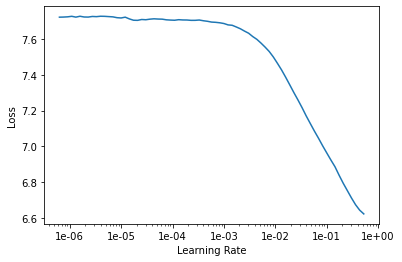

In [20]:
learn_lm.recorder.plot(skip_end=15)

In [21]:
# training the top layer's while keeping bottom layer's in freeze state
learn_lm.fit_one_cycle(2,5e-2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.784433,4.880468,0.223170,00:02
1,4.841031,4.773610,0.233170,00:02


In [22]:
learn_lm.unfreeze()

In [23]:
learn_lm.fit_one_cycle(1, 3e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,5.229563,4.921773,0.232902,00:02


In [24]:
# saving encoder for using it in classification model
learn_lm.save_encoder('fine_tuned_enc_info')

In [25]:
# preprocessing and creating test data for classification
test_data_clas = (TextList
           .from_df(test_data_info_text,path,cols='tweet_text',vocab=data_lm.vocab)
           .split_from_df(col='is_test')
           .label_from_df(cols='label_text')
           .databunch())

In [26]:
#preprocessing and creating data for classification
data_clas = (TextList.from_df(data_info_text,path,cols='tweet_text',vocab=data_lm.vocab)
                   .split_from_df(col='is_valid')
                   .label_from_df(cols='label_text')
                   .add_test(test_data_clas.valid_ds)
                   .databunch())

In [27]:
data_clas

TextClasDataBunch;

Train: LabelList (9601 items)
x: TextList
xxbos pls share were xxunk wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via
y: CategoryList
informative,informative,informative,informative,informative
Path: /notebooks/CrisisMMD_Dataset;

Valid: LabelList (1573 items)
x: TextList
xxbos we ve lost track of how many xxunk teams have helped so proud of our church harvey,xxbos the xxunk above xxunk got destroyed the xxunk wall got blown out hurricanemaria,xxbos californias xxunk fire in xxunk captured in pictures and videos xxunk,xxbos one of the first solar storage tesla energy projects in puerto rico has come online,xxbos tornado warning including xxunk wa xxunk river wa deep river wa until pm xxunk
y: CategoryList
informative,informative,infor

In [28]:
# showing data with labels
data_clas.show_batch()

text,target
xxbos ya ll be sure to get in on this week xxunk ve got to know what you think you know in case need to know,not_informative
xxbos we did the mickey not so scary halloween at magic kingdom last night it was fun after irma we needed to do so,not_informative
xxbos ken former london mayor is in my xxunk ken at mora rd xxunk station to vote for to be pm jeremy this morning,not_informative
xxbos all eyes on maria as it heads over simliar islands that got hit with irma sending fto them as we watch it closely,informative
xxbos me seeing that xxunk of xxunk fans are going to virginia to see xxunk fisher while i m stuck in fucking puerto rico,not_informative


In [29]:
# importing pretrained AWD-LSTM model and making learner object consist of data,model,metrics and callbacks for training
learn_clas = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,metrics=[accuracy,Precision(average='macro'),
                Precision(average='weighted'),Recall(average='macro'),Recall(average='weighted'),
               FBeta(average='macro',beta=1.),FBeta(average='weighted',beta=1.)],
            callback_fns=[ShowGraph,partial(EarlyStoppingCallback, monitor='valid_loss', min_delta=0.01, patience=3),
               partial(ReduceLROnPlateauCallback,monitor='valid_loss', mode='auto', patience=0,
                       factor=0.2, min_delta=0, min_lr=0.000001)]  
            )

In [30]:
# laoding encoder for classification
learn_clas.load_encoder('fine_tuned_enc_info')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (9601 items)
x: TextList
xxbos pls share were xxunk wildfire response recovery info here,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos california wildfires destroy more than structures kakenews,xxbos photos of california destructive wildfires via
y: CategoryList
informative,informative,informative,informative,informative
Path: /notebooks/CrisisMMD_Dataset;

Valid: LabelList (1573 items)
x: TextList
xxbos we ve lost track of how many xxunk teams have helped so proud of our church harvey,xxbos the xxunk above xxunk got destroyed the xxunk wall got blown out hurricanemaria,xxbos californias xxunk fire in xxunk captured in pictures and videos xxunk,xxbos one of the first solar storage tesla energy projects in puerto rico has come online,xxbos tornado warning including xxunk wa xxunk river wa deep river wa until pm xxunk
y: CategoryList
informative,i

In [31]:
learn_clas.lr_find()

In [32]:
learn_clas.recorder.plot()

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.463159,0.418488,0.813732,0.795916,0.809693,0.769453,0.813732,0.779732,0.809386,00:03
1,0.425967,0.425557,0.812460,0.788799,0.810452,0.781341,0.812460,0.784794,0.811234,00:03


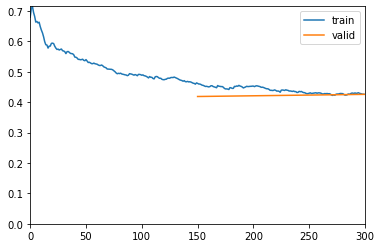

Better model found at epoch 0 with valid_loss value: 0.41848769783973694.


In [33]:
# training the model's top layer's keeping keep other layer's in freezing mode, all the metrics shown here, have been
# evaluted on validation set
learn_clas.fit_one_cycle(2,5e-3,moms=(0.8,0.7),wd=1e-1)

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.441931,0.408225,0.825811,0.807089,0.822783,0.789803,0.825811,0.797180,0.823291,00:04
1,0.409333,0.388842,0.830261,0.808830,0.828989,0.803484,0.830261,0.806026,0.829520,00:04
2,0.352338,0.382866,0.825175,0.810485,0.821780,0.781925,0.825175,0.793019,0.820974,00:04


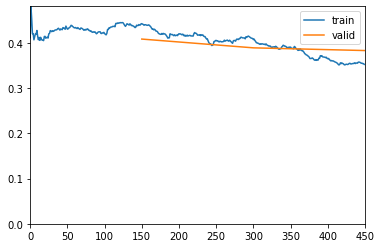

Better model found at epoch 0 with valid_loss value: 0.40822508931159973.
Better model found at epoch 1 with valid_loss value: 0.38884225487709045.
Better model found at epoch 2 with valid_loss value: 0.3828662931919098.


In [34]:
learn_clas.freeze_to(-2)
learn_clas.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7),wd=1e-1)

In [35]:
# learn_clas.freeze_to(-3)
# learn_clas.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,precision,precision,recall,recall,f_beta,f_beta,time
0,0.334875,0.382986,0.826446,0.810771,0.823105,0.785340,0.826446,0.795489,0.822754,00:04
1,0.326818,0.384640,0.830261,0.814534,0.827129,0.791143,0.830261,0.800678,0.826990,00:04
2,0.332545,0.378091,0.832804,0.818953,0.829788,0.792050,0.832804,0.802750,0.829133,00:04
3,0.301184,0.392260,0.831532,0.829249,0.830793,0.777281,0.831532,0.794466,0.824374,00:04


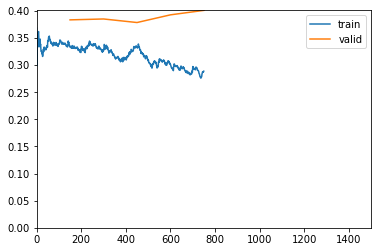

Better model found at epoch 0 with valid_loss value: 0.38298630714416504.
Epoch 1: reducing lr to 0.000152
Better model found at epoch 2 with valid_loss value: 0.37809115648269653.
Epoch 3: reducing lr to 0.00019009692640269474
Epoch 4: early stopping
Epoch 4: reducing lr to 0.00016234913078995263


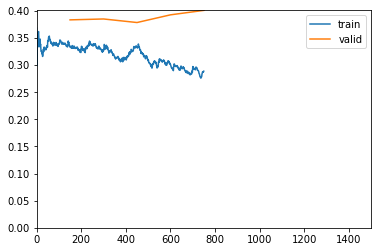

In [36]:
# training all layer's of the model and saving the best one
learn_clas.unfreeze()
learn_clas.fit_one_cycle(10, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7),
                    callbacks=[SaveModelCallback(learn_img,every='improvement', monitor='accuracy', name='best')])

In [37]:
interp = ClassificationInterpretation.from_learner(learn_clas)

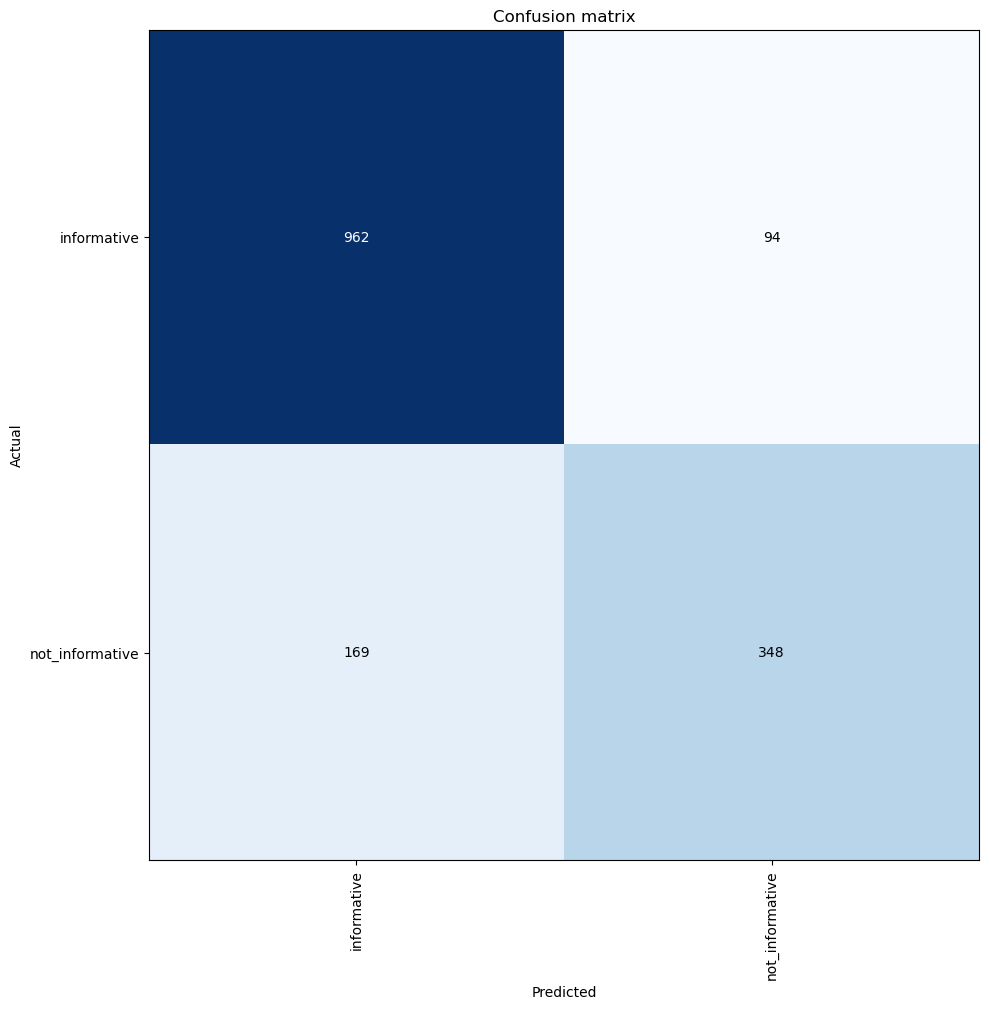

In [38]:
#plotting the confusion matrix
interp.plot_confusion_matrix(figsize=(10,10), dpi=100)

In [39]:
#making on validation set to use it classification report
preds,y,losses = learn_clas.get_preds(ds_type=DatasetType.Valid,with_loss=True)

y_preds = preds.argmax(1)

In [40]:
target_names = ['informative', 'non-informative']
print(classification_report(y, y_preds, target_names=target_names))

                 precision    recall  f1-score   support

    informative       0.85      0.91      0.88      1056
non-informative       0.79      0.67      0.73       517

       accuracy                           0.83      1573
      macro avg       0.82      0.79      0.80      1573
   weighted avg       0.83      0.83      0.83      1573



In [41]:
learn_clas.validate(test_data_clas.valid_dl,metrics=[accuracy,Precision(average='macro'),Precision(average='weighted'),
                                                     Recall(average='macro'),Recall(average='weighted'),
                                                    FBeta(average='macro',beta=1),FBeta(average='weighted',beta=1)])

[0.3577842,
 tensor(0.8540),
 tensor(0.8471),
 tensor(0.8523),
 tensor(0.8137),
 tensor(0.8540),
 tensor(0.8268),
 tensor(0.8503)]

In [42]:
#making on test set to use it classification report
preds,y,losses = learn_clas.get_preds(ds_type=DatasetType.Test,with_loss=True)

In [43]:
y_preds = preds.argmax(1)

In [44]:
y = [test_data_clas.valid_ds[i][1].data for i in range(len(test_data_clas.valid_ds))]

In [45]:
print(classification_report(y, y_preds, target_names=target_names))

                 precision    recall  f1-score   support

    informative       0.87      0.92      0.89      1030
non-informative       0.81      0.72      0.76       504

       accuracy                           0.85      1534
      macro avg       0.84      0.82      0.83      1534
   weighted avg       0.85      0.85      0.85      1534

